# Rate of unemployment compared to consumer price index

## 1. The problem/project
Here I am going to check the correlation between unemployment where I live (Iceland) compared to consumer price index. This is a practise for me to get myself more comfortable using Jupiter notebooks (Google's Colab) and put to practise some of the method I have learned from the Machine Learning course I recently finished. 

## 2. The data
I am going to use monthly unemployment data from the Icelandic Directorate of Labour from 1980 until 2020. We will also be using consumer price index (Vísitala neysluverðs) from Statistics Iceland for each month. I have not been able to find average point gain/loss for Iceland, which might be because I am not looking in the correct places.

## 3. Data cleaning
The data I got from Directorate of Labour is very good. I have however needed to transpose the data, because I want the time being presented on each line, instead of columns. I have also needed to delete few graphs from the excel sheet. I also deleted empty columns and specific male (karlar) and female (konur) from the data, and marked the corresponding colums with kk (karlkyn) for male and kvk (kvenkyn) for female. For the consumer price index, I had to change out . (fullstop) for , (comma) in order to clean the data up a bit. I also cleaned up spelling because special Icelandic letters were not showing up as they should. When I start working with the data in Jupyter, I will probably clean out the yearly average to have the data consist better with unemployment data. All data is in Icelandic, but I will try to precent it in English to my best ability.

## 4. Data selection
Nothing to say here for the moment

## 5. Evaluation
Being able to show graphs, barplot, scatterplot, and more with both matplotlib and seaborn. Being able to plot graph with barplot where the graph is consumer price index. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
xls1 = pd.read_excel('atvinnuleysi-fra-1980-manadarlegt.xlsx', sheet_name='1980-1990', date_parser='Date')
xls2 = pd.read_excel('atvinnuleysi-fra-1980-manadarlegt.xlsx', sheet_name='1991-2000', date_parser='Date')
xls3 = pd.read_excel('atvinnuleysi-fra-1980-manadarlegt.xlsx', sheet_name='2001-2010', date_parser='Date')
xls4 = pd.read_excel('atvinnuleysi-fra-1980-manadarlegt.xlsx', sheet_name='2011-', date_parser='Date')
xls1.head(10)

,Date,Atvinnuleysi alls,Karlar,Konur,Höfuðborgarsv.,Landsbyggðin,Suðurnes,Vesturland,Vestfirðir,Norðurl. Vestra,...,Suðurland(kk),Höfuðborgarsv.(kvk),Landsbyggðin(kvk),Suðurnes(kvk),Vesturland(kvk),Vestfirðir(kvk),Norðurl. vestra(kvk),Norðurl. eystra(kvk),Austurland(kvk),Suðurland(kvk)
0,1980-01-01,0.641012,0.527504,0.807484,0.362689,0.966892,0.697535,0.410760,0.277657,1.742159,...,0.730841,0.443182,1.263731,0.932390,0.545662,0.363447,2.234361,1.870899,1.355556,1.178931
1,1980-02-01,0.395083,0.324980,0.498006,0.223301,0.596687,0.430014,0.252943,0.170892,1.078351,...,0.450604,0.272943,0.780768,0.575318,0.336191,0.223768,1.385655,1.158616,0.837798,0.728137
2,1980-03-01,0.284927,0.234324,0.359257,0.160963,0.430563,0.310149,0.182346,0.123167,0.779178,...,0.325018,0.196774,0.563684,0.415119,0.242415,0.161300,1.002089,0.837363,0.604955,0.525610
3,1980-04-01,0.279793,0.230100,0.352789,0.158059,0.422817,0.304562,0.179057,0.120945,0.765208,...,0.319165,0.193226,0.553557,0.407650,0.238046,0.158390,0.984162,0.822359,0.594090,0.516162
4,1980-05-01,0.153348,0.126084,0.193419,0.086581,0.231887,0.166942,0.098092,0.066239,0.420317,...,0.174958,0.105861,0.303768,0.223553,0.130443,0.086762,0.541124,0.451827,0.326071,0.283200
5,1980-06-01,0.151487,0.124554,0.191073,0.085530,0.229075,0.164917,0.096901,0.065435,0.415230,...,0.172835,0.104576,0.300088,0.220842,0.128859,0.085709,0.534582,0.446360,0.322121,0.279768
6,1980-07-01,0.294831,0.242474,0.371735,0.166565,0.445507,0.320927,0.188691,0.127456,0.806124,...,0.336312,0.203621,0.583222,0.429529,0.250845,0.166914,1.036663,0.866304,0.625913,0.543835
7,1980-08-01,0.385784,0.317326,0.486297,0.218036,0.582671,0.419896,0.246982,0.166861,1.053140,...,0.440004,0.266511,0.762461,0.561801,0.328273,0.218492,1.353358,1.131550,0.818164,0.711055
8,1980-09-01,0.165687,0.136232,0.208975,0.093552,0.250528,0.180373,0.105990,0.071574,0.454039,...,0.189032,0.114383,0.328170,0.241526,0.140941,0.093748,0.584480,0.488064,0.352258,0.305954
9,1980-10-01,0.212797,0.174982,0.268361,0.120177,0.321685,0.231649,0.136149,0.091950,0.582660,...,0.242765,0.146928,0.421286,0.310134,0.181028,0.120429,0.749775,0.626263,0.452177,0.392791


In [4]:
xls1.dtypes

Date                    datetime64[ns]
Atvinnuleysi alls              float64
Karlar                         float64
Konur                          float64
Höfuðborgarsv.                 float64
Landsbyggðin                   float64
Suðurnes                       float64
Vesturland                     float64
Vestfirðir                     float64
Norðurl. Vestra                float64
Norðurl. eystra                float64
Austurland                     float64
Suðurland                      float64
Höfuðborgarsv.(kk)             float64
Landsbyggðin(kk)               float64
Suðurnes(kk)                   float64
Vesturland(kk)                 float64
Vestfirðir(kk)                 float64
Norðurl. vestra(kk)            float64
Norðurl. eystra(kk)            float64
Austurland(kk)                 float64
Suðurland(kk)                  float64
Höfuðborgarsv.(kvk)            float64
Landsbyggðin(kvk)              float64
Suðurnes(kvk)                  float64
Vesturland(kvk)          

In [5]:
xls2.head(10)

,Date,Atvinnuleysi alls,Karlar,Konur,Höfuðborgarsv.,Landsbyggðin,Suðurnes,Vesturland,Vestfirðir,Norðurl. Vestra,...,Suðurland(kk),Höfuðborgarsv.(kvk),Landsbyggðin(kvk),Suðurnes(kvk),Vesturland(kvk),Vestfirðir(kvk),Norðurl. vestra(kvk),Norðurl. eystra(kvk),Austurland(kvk),Suðurland(kvk)
0,1991-01-01,2.625968,2.287896,3.094723,1.291125,4.391852,4.153540,3.229096,0.347998,6.324743,...,3.003471,1.112202,5.959720,6.852319,5.337007,0.224468,7.848327,6.283835,8.468160,5.421110
1,1991-02-01,1.792937,1.698141,1.925165,1.286900,2.475768,1.590198,1.977062,0.261226,4.334149,...,1.736328,1.144635,3.087959,2.207682,3.399338,0.168446,5.015545,3.001801,4.261550,3.274903
2,1991-03-01,1.498323,1.395715,1.641420,1.041236,2.115841,0.743616,1.691234,0.196047,4.454762,...,1.164290,1.008274,2.588206,1.116161,2.938123,0.056212,4.964291,2.683459,3.698263,2.546131
3,1991-04-01,1.411025,1.265220,1.614153,0.991066,1.978890,0.884300,1.685384,0.192054,3.693191,...,1.156909,0.994272,2.541416,1.279776,2.844914,0.000000,4.361870,2.666970,3.665214,2.619450
4,1991-05-01,1.171783,1.052605,1.337923,0.849945,1.607993,0.789591,1.813127,0.124317,3.020614,...,1.075994,0.881445,2.023603,0.734483,2.864655,0.053430,3.035114,2.176549,1.752353,2.687814
5,1991-06-01,1.046441,0.786439,1.407674,0.863669,1.294989,1.139463,1.510085,0.160916,1.420891,...,0.678862,1.084493,1.894763,1.799393,2.219898,0.051890,1.952719,2.167700,1.546727,2.401792
6,1991-07-01,1.240603,0.995426,1.581355,0.988614,1.582709,1.416249,2.122805,0.273399,1.782961,...,0.838433,1.106835,2.293790,1.850851,3.124331,0.251672,2.532219,3.070828,1.504013,2.267533
7,1991-08-01,1.098452,0.830633,1.470473,0.820381,1.475738,1.653629,2.051542,0.201064,1.401159,...,1.151643,1.099473,2.028955,2.521636,2.916181,0.155509,2.103638,2.621277,1.429449,1.455054
8,1991-09-01,0.924335,0.719485,1.209322,0.577493,1.394167,2.716939,1.376590,0.225452,1.548765,...,0.879171,0.657632,2.036049,5.142880,2.126174,0.263976,2.041551,1.904784,1.616348,1.018276
9,1991-10-01,1.274792,0.995728,1.662323,0.683499,2.071108,4.524024,1.265138,0.934069,1.986587,...,1.102441,0.673839,3.127339,8.699390,1.993631,1.593988,1.976897,2.596960,3.203602,1.760002


In [6]:
xls2.dtypes

Date                    datetime64[ns]
Atvinnuleysi alls              float64
Karlar                         float64
Konur                          float64
Höfuðborgarsv.                 float64
Landsbyggðin                   float64
Suðurnes                       float64
Vesturland                     float64
Vestfirðir                     float64
Norðurl. Vestra                float64
Norðurl. eystra                float64
Austurland                     float64
Suðurland                      float64
Höfuðborgarsv.(kk)             float64
Landsbyggðin(kk)               float64
Suðurnes(kk)                   float64
Vesturland(kk)                 float64
Vestfirðir(kk)                 float64
Norðurl. vestra(kk)            float64
Norðurl. eystra(kk)            float64
Austurland(kk)                 float64
Suðurland(kk)                  float64
Höfuðborgarsv.(kvk)            float64
Landsbyggðin(kvk)              float64
Suðurnes(kvk)                  float64
Vesturland(kvk)          

In [7]:
xls3.head(10)

,Date,Atvinnuleysi alls,Karlar,Konur,Höfuðborgarsv.,Landsbyggðin,Suðurnes,Vesturland,Vestfirðir,Norðurl. Vestra,...,Suðurland(kk),Höfuðborgarsv.(kvk),Landsbyggðin(kvk),Suðurnes(kvk),Vesturland(kvk),Vestfirðir(kvk),Norðurl. vestra(kvk),Norðurl. eystra(kvk),Austurland(kvk),Suðurland(kvk)
0,2001-01-01,1.579014,1.191214,2.095841,1.210733,2.118947,1.529990,1.201060,2.385903,2.662581,...,1.153946,1.479491,3.085030,2.782934,1.999045,3.785802,3.493322,2.931460,3.693349,3.400166
1,2001-02-01,1.543258,1.161057,2.052694,1.227627,2.006612,1.453324,1.120087,1.758057,2.541888,...,0.997448,1.501161,2.939382,2.686214,1.902602,3.082135,3.543614,2.948395,2.795827,3.575026
2,2001-03-01,1.463788,1.086843,1.966285,1.256575,1.768810,1.119723,1.066031,1.377458,2.461259,...,0.619823,1.547177,2.642453,2.199709,1.676828,2.624318,3.493322,2.999164,2.720278,2.738758
3,2001-04-01,1.606812,1.185651,2.167658,1.282038,2.083476,1.311152,1.282451,1.308099,2.530789,...,0.823443,1.592930,3.091053,2.155785,1.896034,2.421546,3.276160,3.352720,5.158813,3.182494
4,2001-05-01,1.555751,1.058742,2.216422,1.223792,2.042875,1.915047,1.206401,1.812665,1.801073,...,0.679368,1.543775,3.294336,3.289237,2.054660,3.222791,2.649539,3.288350,5.592109,3.090886
5,2001-06-01,1.224607,0.759048,1.843953,1.346929,1.043051,0.843644,0.683882,0.898366,1.084238,...,0.265009,1.908188,1.738972,1.518001,1.159363,1.711607,1.715526,2.254477,1.560871,1.745172
6,2001-07-01,1.116285,0.660521,1.722749,1.330188,0.798069,0.575545,0.481047,0.583966,0.717754,...,0.114652,1.918358,1.401930,1.058800,0.862553,1.005343,1.149958,2.053599,1.413378,1.431877
7,2001-08-01,1.080840,0.661868,1.638828,1.282447,0.781008,0.423609,0.507479,0.580802,0.738306,...,0.176829,1.833756,1.319135,0.687300,0.978096,0.985289,0.987562,1.824547,1.739211,1.367323
8,2001-09-01,1.044702,0.711779,1.488988,1.185807,0.835169,0.554589,0.568822,0.571822,0.673979,...,0.270192,1.556885,1.378014,1.015939,1.027922,1.103747,1.056535,1.859657,1.481635,1.436689
9,2001-10-01,1.234974,0.903320,1.677574,1.346929,1.068848,0.963957,0.684888,0.851653,0.747562,...,0.443244,1.667914,1.693331,1.735964,1.205179,1.277100,1.330558,2.194196,1.548005,1.770259


In [8]:
# After fixing the actual file (deleting "empty", columns), this is no longer needed
# xls3= xls3[xls3.columns[~xls3.columns.str.contains('Unnamed: ')]]

In [9]:
xls3.dtypes

Date                    datetime64[ns]
Atvinnuleysi alls              float64
Karlar                         float64
Konur                          float64
Höfuðborgarsv.                 float64
Landsbyggðin                   float64
Suðurnes                       float64
Vesturland                     float64
Vestfirðir                     float64
Norðurl. Vestra                float64
Norðurl. eystra                float64
Austurland                     float64
Suðurland                      float64
Höfuðborgarsv.(kk)             float64
Landsbyggðin(kk)               float64
Suðurnes(kk)                   float64
Vesturland(kk)                 float64
Vestfirðir(kk)                 float64
Norðurl. vestra(kk)            float64
Norðurl. eystra(kk)            float64
Austurland(kk)                 float64
Suðurland(kk)                  float64
Höfuðborgarsv.(kvk)            float64
Landsbyggðin(kvk)              float64
Suðurnes(kvk)                  float64
Vesturland(kvk)          

In [10]:
xls4.head(10)

,Date,Atvinnuleysi alls,Karlar,Konur,Höfuðborgarsv.,Landsbyggðin,Suðurnes,Vesturland,Vestfirðir,Norðurl. Vestra,...,Suðurland(kk),Höfuðborgarsv.(kvk),Landsbyggðin(kvk),Suðurnes(kvk),Vesturland(kvk),Vestfirðir(kvk),Norðurl. vestra(kvk),Norðurl. eystra(kvk),Austurland(kvk),Suðurland(kvk)
0,2011-01-01,8.470165,9.128931,7.650644,8.965878,7.594981,14.274974,5.304902,4.197601,3.812728,...,7.847534,7.858190,7.272147,14.585588,5.072679,4.252492,3.703704,5.900175,6.266718,6.293843
1,2011-02-01,8.641760,9.313180,7.806497,9.162129,7.723140,14.475780,5.366865,4.925968,4.108440,...,7.690015,8.050589,7.361768,14.757282,5.087252,4.638834,3.500955,5.818760,6.669207,6.411502
2,2011-03-01,8.580812,9.170944,7.846672,9.173873,7.533892,14.519885,5.141753,4.527448,3.945540,...,7.377778,8.162823,7.270428,14.647223,4.910320,4.216074,3.544304,5.926043,6.287879,6.353805
3,2011-04-01,8.081131,8.633280,7.411165,8.726363,6.942104,13.629333,4.758308,4.202378,4.124830,...,6.746671,7.788221,6.723777,13.349866,4.759207,3.997462,3.719512,5.360134,5.802920,5.898772
4,2011-05-01,7.419632,7.682086,7.101177,8.190513,6.058873,12.100618,4.127488,3.459372,3.159558,...,5.678592,7.615324,6.163903,12.106635,4.369332,4.002463,2.781065,5.214180,5.061947,5.379061
5,2011-06-01,6.716329,6.751756,6.716329,7.622952,5.115917,10.591260,3.497333,2.603489,2.300000,...,4.493453,7.342499,5.453568,10.938108,3.868730,3.108189,1.665709,4.846573,3.953249,4.907115
6,2011-07-01,6.622034,6.472351,6.802769,7.550083,4.983889,10.275277,3.580838,2.577591,2.039762,...,4.046888,7.476765,5.574019,11.098039,3.978495,3.130644,1.736111,5.099682,3.531856,5.155367
7,2011-08-01,6.743669,6.515878,7.018715,7.741954,4.981507,10.440442,3.466140,2.546735,2.207447,...,3.967227,7.766416,5.655604,11.351242,3.903654,3.535980,1.966627,5.059524,3.673324,5.164575
8,2011-09-01,6.622907,6.437180,6.847162,7.615907,4.869953,10.717897,3.154012,2.402235,2.056485,...,3.674618,7.562654,5.542982,11.638559,3.768199,3.260870,1.904177,5.001534,4.117647,4.386952
9,2011-10-01,6.817101,6.518358,7.192163,7.711343,5.238531,11.532724,3.418473,2.634561,2.196885,...,3.913750,7.803027,6.078556,12.883038,4.260355,3.445991,2.229299,5.231356,4.916159,4.722114


In [11]:
xls4.dtypes

Date                    datetime64[ns]
Atvinnuleysi alls              float64
Karlar                         float64
Konur                          float64
Höfuðborgarsv.                 float64
Landsbyggðin                   float64
Suðurnes                       float64
Vesturland                     float64
Vestfirðir                     float64
Norðurl. Vestra                float64
Norðurl. eystra                float64
Austurland                     float64
Suðurland                      float64
Höfuðborgarsv.(kk)             float64
Landsbyggðin(kk)               float64
Suðurnes(kk)                   float64
Vesturland(kk)                 float64
Vestfirðir(kk)                 float64
Norðurl. vestra(kk)            float64
Norðurl. eystra(kk)            float64
Austurland(kk)                 float64
Suðurland(kk)                  float64
Höfuðborgarsv.(kvk)            float64
Landsbyggðin(kvk)              float64
Suðurnes(kvk)                  float64
Vesturland(kvk)          

In [12]:
# We need to append all of the cheets together. 
df = pd.concat([xls1, xls2, xls3, xls4])
df

,Date,Atvinnuleysi alls,Karlar,Konur,Höfuðborgarsv.,Landsbyggðin,Suðurnes,Vesturland,Vestfirðir,Norðurl. Vestra,...,Suðurland(kk),Höfuðborgarsv.(kvk),Landsbyggðin(kvk),Suðurnes(kvk),Vesturland(kvk),Vestfirðir(kvk),Norðurl. vestra(kvk),Norðurl. eystra(kvk),Austurland(kvk),Suðurland(kvk)
0,1980-01-01,0.641012,0.527504,0.807484,0.362689,0.966892,0.697535,0.410760,0.277657,1.742159,...,0.730841,0.443182,1.263731,0.932390,0.545662,0.363447,2.234361,1.870899,1.355556,1.178931
1,1980-02-01,0.395083,0.324980,0.498006,0.223301,0.596687,0.430014,0.252943,0.170892,1.078351,...,0.450604,0.272943,0.780768,0.575318,0.336191,0.223768,1.385655,1.158616,0.837798,0.728137
2,1980-03-01,0.284927,0.234324,0.359257,0.160963,0.430563,0.310149,0.182346,0.123167,0.779178,...,0.325018,0.196774,0.563684,0.415119,0.242415,0.161300,1.002089,0.837363,0.604955,0.525610
3,1980-04-01,0.279793,0.230100,0.352789,0.158059,0.422817,0.304562,0.179057,0.120945,0.765208,...,0.319165,0.193226,0.553557,0.407650,0.238046,0.158390,0.984162,0.822359,0.594090,0.516162
4,1980-05-01,0.153348,0.126084,0.193419,0.086581,0.231887,0.166942,0.098092,0.066239,0.420317,...,0.174958,0.105861,0.303768,0.223553,0.130443,0.086762,0.541124,0.451827,0.326071,0.283200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2020-05-01,7.400000,7.600000,7.200000,0.077607,0.068530,12.200000,0.045325,0.038205,0.027799,...,0.063405,0.071363,0.073334,13.600000,0.047227,0.038125,0.028262,0.063273,0.051308,0.067805
113,2020-06-01,7.500000,7.500000,7.400000,0.078232,6.800000,13.200000,0.046075,0.033333,0.026818,...,0.061925,7.400000,7.400000,14.900000,0.048082,0.033416,0.029184,0.055610,0.045424,0.066977
114,2020-07-01,7.900000,7.700000,8.100000,8.300000,7.100000,15.200000,4.600000,3.000000,2.800000,...,6.000000,8.200000,7.900000,17.800000,5.100000,3.200000,3.200000,5.400000,3.900000,6.600000
115,2020-08-01,8.500000,8.300000,8.800000,0.089000,7.800000,16.900000,5.000000,2.900000,3.100000,...,6.400000,8.800000,8.600000,19.800000,5.500000,2.800000,3.500000,5.800000,4.000000,7.000000


In [13]:
df.isna().sum()

Date                    0
Atvinnuleysi alls       0
Karlar                  0
Konur                   0
Höfuðborgarsv.          0
Landsbyggðin            0
Suðurnes                0
Vesturland              0
Vestfirðir              0
Norðurl. Vestra         0
Norðurl. eystra         0
Austurland              0
Suðurland               0
Höfuðborgarsv.(kk)      0
Landsbyggðin(kk)        0
Suðurnes(kk)            0
Vesturland(kk)          0
Vestfirðir(kk)          0
Norðurl. vestra(kk)     0
Norðurl. eystra(kk)     0
Austurland(kk)          0
Suðurland(kk)           0
Höfuðborgarsv.(kvk)     0
Landsbyggðin(kvk)       0
Suðurnes(kvk)           0
Vesturland(kvk)         0
Vestfirðir(kvk)         0
Norðurl. vestra(kvk)    0
Norðurl. eystra(kvk)    0
Austurland(kvk)         0
Suðurland(kvk)          0
dtype: int64

Good, now we finally have data frame in the correct. All of the data is percentage, so 0.6 actually means 0.6% unemployment, while 18.5 means 18.5%. Now it is possible to import the consumer price index (cpi). 

In [14]:
cpi = pd.read_csv('Visitala_neysluverds.csv', date_parser='Ár')
cpi.head(24)

,Ár,Vísitala neysluverðs Grunnur frá 1981
0,01.01.80,NaN
1,01.02.80,NaN
2,01.03.80,NaN
3,01.04.80,NaN
4,01.05.80,NaN
5,01.06.80,NaN
6,01.07.80,NaN
7,01.08.80,NaN
8,01.09.80,NaN
9,01.10.80,NaN


In [15]:
# After going through the whole document and getting months and years in one cell, and deleting all the rows 
# with "Meðaltal ársins" content, this is no longer needed
# cpi = cpi[cpi != 'Meðaltal ársins']

In [16]:
cpi.head(24)

,Ár,Vísitala neysluverðs Grunnur frá 1981
0,01.01.80,NaN
1,01.02.80,NaN
2,01.03.80,NaN
3,01.04.80,NaN
4,01.05.80,NaN
5,01.06.80,NaN
6,01.07.80,NaN
7,01.08.80,NaN
8,01.09.80,NaN
9,01.10.80,NaN


In [17]:
cpi.tail(24)

,Ár,Vísitala neysluverðs Grunnur frá 1981
468,01.01.19,"4496,7"
469,01.02.19,"4505,4"
470,01.03.19,"4528,9"
471,01.04.19,"4545,3"
472,01.05.19,"4555,8"
473,01.06.19,"4572,9"
474,01.07.19,"4562,8"
475,01.08.19,"4575,6"
476,01.09.19,"4579,7"
477,01.10.19,"4596,3"


In [18]:
cpi.isna().sum()

Ár                                        0
Vísitala neysluverðs Grunnur frá 1981    15
dtype: int64

In [19]:
cpi.dtypes

Ár                                       object
Vísitala neysluverðs Grunnur frá 1981    object
dtype: object

In [20]:
# Because Iceland uses comma as fraction separator, I need to replace it with a dot, and convert to float
cpi['Vísitala neysluverðs Grunnur frá 1981'] = cpi['Vísitala neysluverðs Grunnur frá 1981'].str.replace(',', '.').astype(float)
cpi.head(24)

,Ár,Vísitala neysluverðs Grunnur frá 1981
0,01.01.80,NaN
1,01.02.80,NaN
2,01.03.80,NaN
3,01.04.80,NaN
4,01.05.80,NaN
5,01.06.80,NaN
6,01.07.80,NaN
7,01.08.80,NaN
8,01.09.80,NaN
9,01.10.80,NaN


In [21]:
cpi.tail(24)

,Ár,Vísitala neysluverðs Grunnur frá 1981
468,01.01.19,4496.7
469,01.02.19,4505.4
470,01.03.19,4528.9
471,01.04.19,4545.3
472,01.05.19,4555.8
473,01.06.19,4572.9
474,01.07.19,4562.8
475,01.08.19,4575.6
476,01.09.19,4579.7
477,01.10.19,4596.3


Now the median and the mean are very close to each other. Median is a bit lower, however, in the beginning of the measurements, the consumer price index was much lower than this, and it will affect the graphs. So I will be changing the first 12 lines to 0 and then fill the rest up with mean.

In [22]:
cpi['Ár'] = cpi['Ár'].str.replace('jan', 'jan')
cpi['Ár'] = cpi['Ár'].str.replace('feb', 'feb')
cpi['Ár'] = cpi['Ár'].str.replace('mar', 'mar')
cpi['Ár'] = cpi['Ár'].str.replace('apr', 'apr')
cpi['Ár'] = cpi['Ár'].str.replace('maí', 'mai')
cpi['Ár'] = cpi['Ár'].str.replace('jún', 'jun')
cpi['Ár'] = cpi['Ár'].str.replace('júl', 'jul')
cpi['Ár'] = cpi['Ár'].str.replace('ágú', 'aug')
cpi['Ár'] = cpi['Ár'].str.replace('okt', 'oct')
cpi['Ár'] = cpi['Ár'].str.replace('nóv', 'nov')
cpi['Ár'] = cpi['Ár'].str.replace('des', 'dec')


cpi

,Ár,Vísitala neysluverðs Grunnur frá 1981
0,01.01.80,NaN
1,01.02.80,NaN
2,01.03.80,NaN
3,01.04.80,NaN
4,01.05.80,NaN
...,...,...
487,01.08.20,4722.0
488,01.09.20,4740.1
489,01.10.20,NaN
490,01.11.20,NaN


In [23]:
# cpi['Ár'] = cpi['Ár'].str.replace(',', '.')
cpi['Ár'] = cpi['Ár'].astype('datetime64')

In [24]:
cpi.dtypes

Ár                                       datetime64[ns]
Vísitala neysluverðs Grunnur frá 1981           float64
dtype: object

In [25]:
cpi['Vísitala neysluverðs Grunnur frá 1981'][:12].fillna(0, inplace=True)
cpi.head(14)

,Ár,Vísitala neysluverðs Grunnur frá 1981
0,1980-01-01,0.0
1,1980-01-02,0.0
2,1980-01-03,0.0
3,1980-01-04,0.0
4,1980-01-05,0.0
5,1980-01-06,0.0
6,1980-01-07,0.0
7,1980-01-08,0.0
8,1980-01-09,0.0
9,1980-01-10,0.0


In [26]:
cpi.isna().sum()

Ár                                       0
Vísitala neysluverðs Grunnur frá 1981    3
dtype: int64

In [27]:
cpi.shape

(492, 2)

In [28]:
533-489

44

In [29]:
# After going through the unemployment data, I don't need to do this anymore to have the same amount of lines
# cpi['Vísitala neysluverðs Grunnur frá 1981'][529:530] = cpi['Vísitala neysluverðs Grunnur frá 1981'][528:529] + 13.4
# cpi.tail(24)

In [30]:
cpi.dropna(inplace=True)
cpi.shape, 

((489, 2),)

In [31]:
df

,Date,Atvinnuleysi alls,Karlar,Konur,Höfuðborgarsv.,Landsbyggðin,Suðurnes,Vesturland,Vestfirðir,Norðurl. Vestra,...,Suðurland(kk),Höfuðborgarsv.(kvk),Landsbyggðin(kvk),Suðurnes(kvk),Vesturland(kvk),Vestfirðir(kvk),Norðurl. vestra(kvk),Norðurl. eystra(kvk),Austurland(kvk),Suðurland(kvk)
0,1980-01-01,0.641012,0.527504,0.807484,0.362689,0.966892,0.697535,0.410760,0.277657,1.742159,...,0.730841,0.443182,1.263731,0.932390,0.545662,0.363447,2.234361,1.870899,1.355556,1.178931
1,1980-02-01,0.395083,0.324980,0.498006,0.223301,0.596687,0.430014,0.252943,0.170892,1.078351,...,0.450604,0.272943,0.780768,0.575318,0.336191,0.223768,1.385655,1.158616,0.837798,0.728137
2,1980-03-01,0.284927,0.234324,0.359257,0.160963,0.430563,0.310149,0.182346,0.123167,0.779178,...,0.325018,0.196774,0.563684,0.415119,0.242415,0.161300,1.002089,0.837363,0.604955,0.525610
3,1980-04-01,0.279793,0.230100,0.352789,0.158059,0.422817,0.304562,0.179057,0.120945,0.765208,...,0.319165,0.193226,0.553557,0.407650,0.238046,0.158390,0.984162,0.822359,0.594090,0.516162
4,1980-05-01,0.153348,0.126084,0.193419,0.086581,0.231887,0.166942,0.098092,0.066239,0.420317,...,0.174958,0.105861,0.303768,0.223553,0.130443,0.086762,0.541124,0.451827,0.326071,0.283200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2020-05-01,7.400000,7.600000,7.200000,0.077607,0.068530,12.200000,0.045325,0.038205,0.027799,...,0.063405,0.071363,0.073334,13.600000,0.047227,0.038125,0.028262,0.063273,0.051308,0.067805
113,2020-06-01,7.500000,7.500000,7.400000,0.078232,6.800000,13.200000,0.046075,0.033333,0.026818,...,0.061925,7.400000,7.400000,14.900000,0.048082,0.033416,0.029184,0.055610,0.045424,0.066977
114,2020-07-01,7.900000,7.700000,8.100000,8.300000,7.100000,15.200000,4.600000,3.000000,2.800000,...,6.000000,8.200000,7.900000,17.800000,5.100000,3.200000,3.200000,5.400000,3.900000,6.600000
115,2020-08-01,8.500000,8.300000,8.800000,0.089000,7.800000,16.900000,5.000000,2.900000,3.100000,...,6.400000,8.800000,8.600000,19.800000,5.500000,2.800000,3.500000,5.800000,4.000000,7.000000


In [32]:
dfX = df['Date'].astype('datetime64')
dfY = df.drop('Date', axis=1)

# Date time from cpi will not be used because the months are not datetime
cpiX = cpi['Ár']
cpiY = cpi['Vísitala neysluverðs Grunnur frá 1981']

dfX.shape, dfY.shape, cpiX.shape, cpiY.shape

((489,), (489, 30), (489,), (489,))

In [33]:
dfX.dtype

dtype('<M8[ns]')

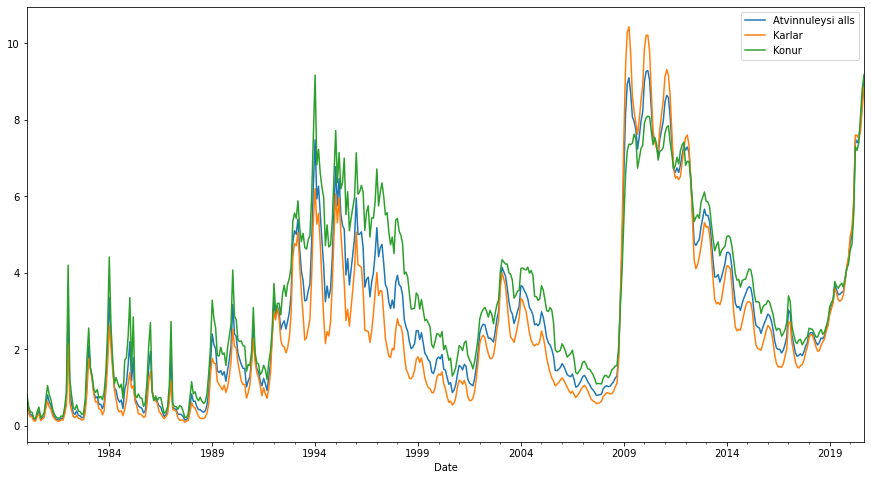

In [34]:
df[['Date', 'Atvinnuleysi alls', 'Karlar', 'Konur']].plot('Date', figsize=(15, 8))

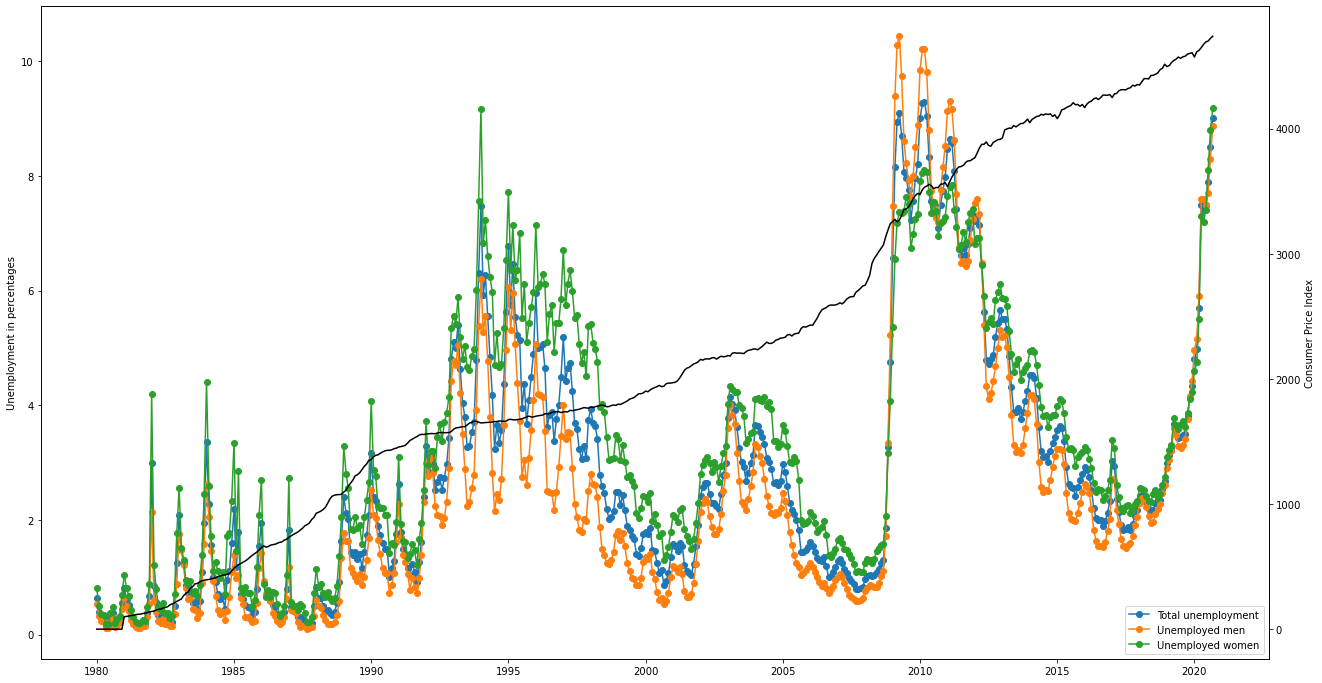

In [35]:
width = 0.5
fig, ax1 = plt.subplots(figsize=(22, 12))
plt.plot_date(dfX, dfY[['Atvinnuleysi alls', 'Karlar', 'Konur']], linestyle='-', label='Atvinnuleysi alls')
#plt.plot_date(dfX, dfY['Karlar'], color='b', linestyle='-', label='Karlar')
#plt.plot_date(dfX, dfY['Konur'], color='r', linestyle='-', label='Konur')
plt.legend(['Total unemployment', 'Unemployed men', 'Unemployed women'], loc=4)

plt.ylabel('Unemployment in percentages')

ax2 = plt.twinx()
ax2.plot(dfX, cpiY, color='k', label='Vísitala neysluverðs')
ax2.grid(False)
ax2.set_ylabel('Consumer Price Index')

plt.show();

Text(0.5, 1.0, 'Total unemployment of women')

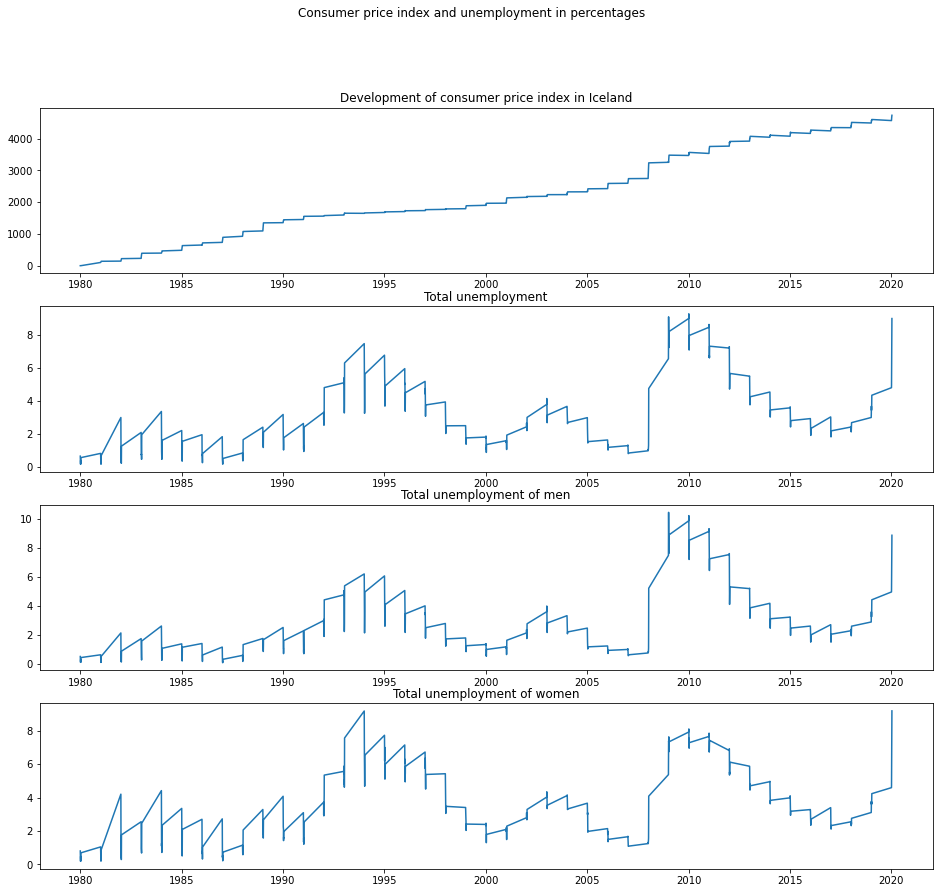

In [41]:
fig, ax = plt.subplots(nrows=4, figsize=(16, 14))
fig.suptitle('Consumer price index and unemployment in percentages')
ax[0].plot(cpiX, cpiY)
ax[0].set_title('Development of consumer price index in Iceland')
ax[1].plot(cpiX, dfY['Atvinnuleysi alls'])
ax[1].set_title('Total unemployment')
ax[2].plot(cpiX, dfY['Karlar'])
ax[2].set_title('Total unemployment of men')
ax[3].plot(cpiX, dfY['Konur'])
ax[3].set_title('Total unemployment of women')